In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import xarray as xr

from mapper_functions import plot_aus_tight_pcm

from my_functions import read_obsfcstana_extend_datetime

In [6]:
path = '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M08'
file_name_start = 'cygd_M36_aus.ens_avg.ldas_ObsFcstAna.201808'
printflag = True
date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)

date_time = np.array(date_time)
obs_species = np.array(obs_species)
obs_tilenum = np.array(obs_tilenum)
obs_lon = np.array(obs_lon)
obs_lat = np.array(obs_lat)
obs_obs = np.array(obs_obs)
obs_fcst = np.array(obs_fcst)
obs_ana = np.array(obs_ana)

['/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M08/cygd_M36_aus.ens_avg.ldas_ObsFcstAna.20180801_0600z.bin', '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M08/cygd_M36_aus.ens_avg.ldas_ObsFcstAna.20180802_2100z.bin', '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M08/cygd_M36_aus.ens_avg.ldas_ObsFcstAna.20180803_0000z.bin', '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M08/cygd_M36_aus.ens_avg.ldas_ObsFcstAna.20180801_0900z.bin', '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2018/M08/cygd_M36_aus.ens_avg.ldas_ObsFcstAna.20180802_0600z.bin', '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL

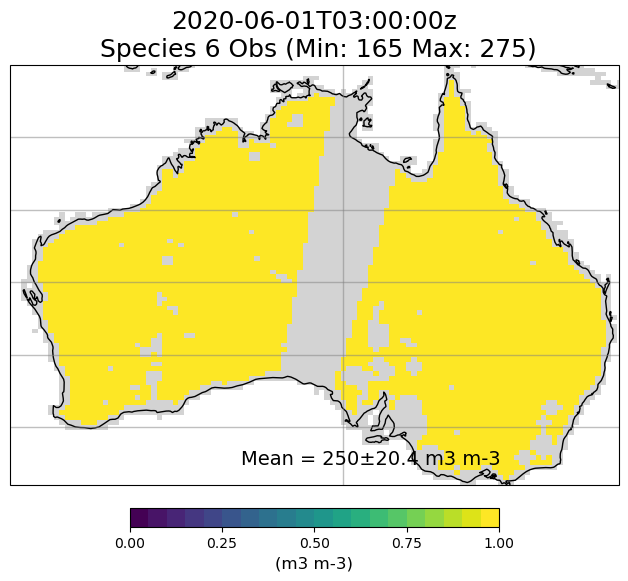

In [8]:
i = 6

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]

obarray[:, 0] = obs_obs[obs_species == i]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_aus_tight_pcm(obarray, False, True, f'2020-06-01T03:00:00z\n Species {i} Obs (Min: {minval:.3g} Max: {maxval:.3g})', 'm3 m-3', 0, 1)

In [4]:
file = '/discover/nobackup/amfox/Experiments/CYGNSS_development/cygd_M36_aus/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2018/M08/cygd_M36_aus.tavg24_1d_lnd_Nt.20180801_1200z.nc4'

ds = xr.open_dataset(file)
            
lon = ds['lon']
lat = ds['lat']

sfmc = ds['SFMC']
            
ds.close()


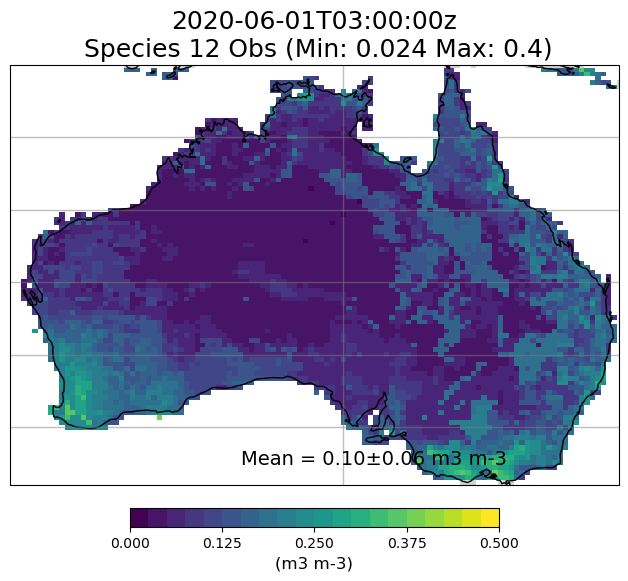

In [5]:
n_tiles = len(lon)
obarray = np.empty([n_tiles, 3])
obarray.fill(np.nan)

obarray[:, 1] = lon
obarray[:, 2] = lat

obarray[:, 0] = sfmc

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_aus_tight_pcm(obarray, False, True, f'2020-06-01T03:00:00z\n Species {i} Obs (Min: {minval:.3g} Max: {maxval:.3g})', 'm3 m-3', 0, 0.5)